<a href="https://colab.research.google.com/github/naot97/Learn-Opencv/blob/master/Hough_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library and read image

In [0]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
import math

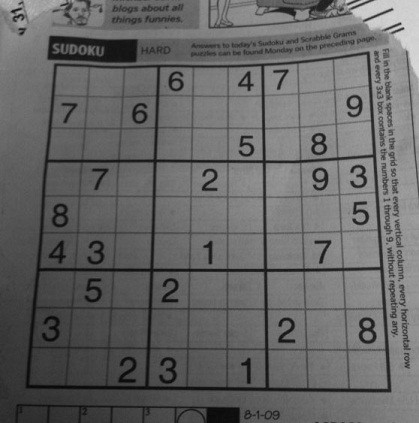

In [64]:
ima = cv2.imread('sudoku.jpeg',0)
cv2_imshow(ima)

# Highlight image

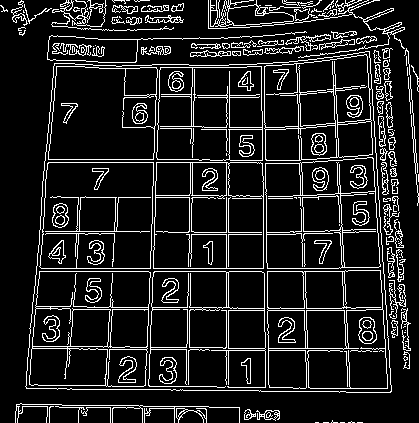

In [65]:
edges = cv2.Canny(ima,50,150,apertureSize = 3)
cv2_imshow(edges)

# Implement Hough Line

595


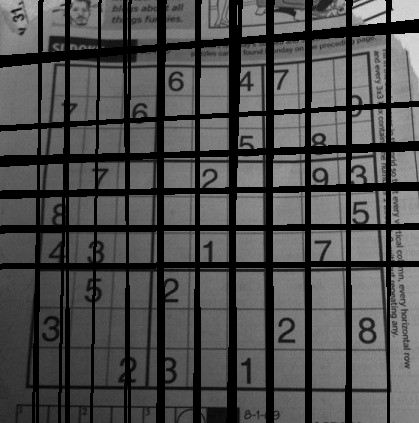

In [67]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)
h,w = edges.shape
l = int(math.sqrt(h**2 + w**2))
valid_num = 180
threshold = 200

for i in range(0,180*5,1):
  angle = math.radians(i/5)  
  cos = np.cos(angle)
  sin = np.sin(angle)
  if cos == 0 or sin == 0:
    continue
  for r in range(0,l,1):
    s = 0
    x0 = r * cos
    y0 = r * sin
    for k in range(-1,-500,-1):
      x1 = int(x0 + k*-sin)     
      y1 = int(y0 + k*cos)
      if x1 in range(w) and y1 in range(h):
        if edges[y1,x1] >= threshold :
          s = s + 1
          if (s >= valid_num):
            x1 = int(x0 + 1000*(-sin))
            y1 = int(y0 + 1000*(cos))
            x2 = int(x0 - 1000*(-sin))
            y2 = int(y0 - 1000*(cos))
            cv2.line(ima,(y1,x1),(y2,x2),(0,0,255),2)
            break
      else :
        break
    
    if (s >= valid_num):
      continue

    for k in range(0,500):
      x1 = int(x0 + k*-sin)     
      y1 = int(y0 + k*cos)
      if x1 in range(w) and y1 in range(h):
        if edges[y1,x1] >= threshold :
          s = s + 1
          if (s >= valid_num):
            x1 = int(x0 + 1000*(-sin))
            y1 = int(y0 + 1000*(cos))
            x2 = int(x0 - 1000*(-sin))
            y2 = int(y0 - 1000*(cos))
            cv2.line(ima,(y1,x1),(y2,x2),(0,0,255),2)
            break
      else :
        break 

    


cv2_imshow(ima)
